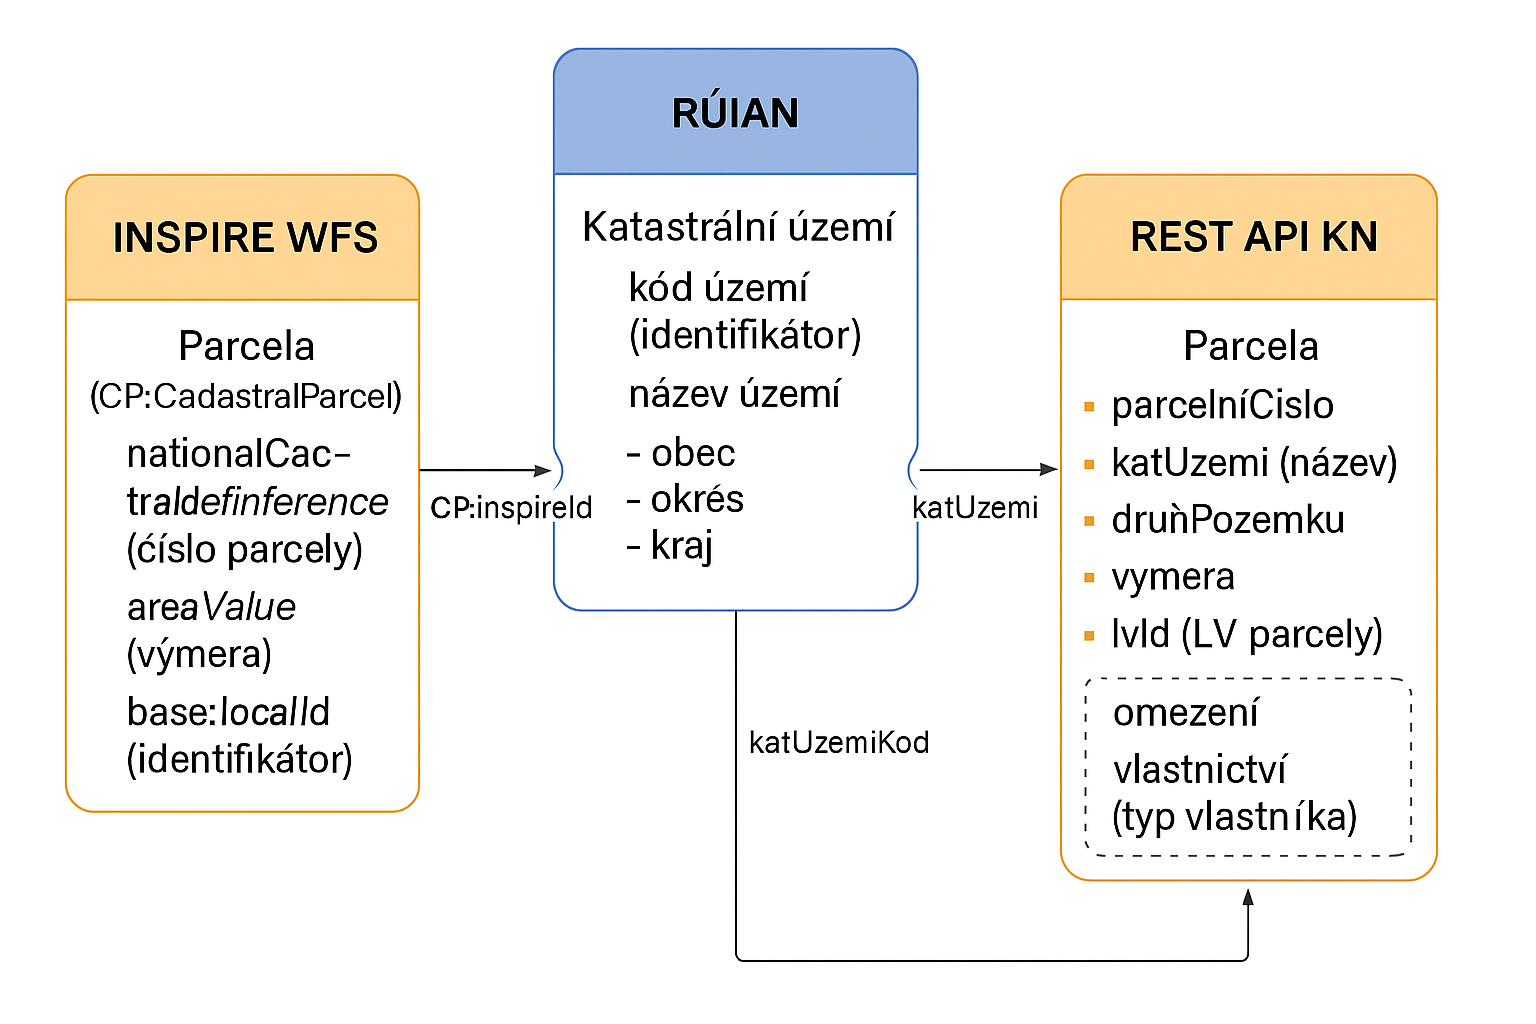

Tady je přehled, jak funguje INSPIRE WFS pro katastrální parcely (Czech Office for Surveying, Mapping and Cadastre – ČÚZK). Výklad je založen na metadatech služby a technických pokynech INSPIRE (verze WFS 2.0.0).

### Jaká data služba obsahuje

* **Harmonizovaná data katastru** – Služba zpřístupňuje harmonizovaná data z ISKN (Cadastral Parcel theme, CP a CPX). Metadokumentace uvádí, že obsahuje „katastrální obvody, parcely, jejich hranice, věcná břemena a další prvky, geodetické body a původní (obloukové) geometrie“.  Na územích se starou analogovou mapou jsou k dispozici pouze referenční body parcel.
* **Zastoupení území** – Funkce **CP.CadastralZoning** (katastrální obvody) pokrývá 100 % území ČR. Funkce **CP.CadastralParcel** a **CP.CadastralBoundary** (parcely a hranice) pokrývají přibližně 99,34 % území – tj. území, kde existuje digitální katastrální mapa.
* **Geometrie a atributy parcel** – Záznam parcely (prvek `CP:CadastralParcel`) obsahuje atributy jako `nationalCadastralReference` (kombinace kódu katastrálního území a parcelního čísla), `areaValue` (výměra v m²), `label` (popisek), `beginLifespanVersion`/`endLifespanVersion` (dobrovolná historie objektu), `inspireId` (jedinečný identifikátor s položkami `base:localId` a `base:namespace`) a `referencePoint` (souřadnice bodu uvnitř parcely).  Dále jsou k dispozici odkazy na katastrální obvod (`cadastralZoning`), na správní jednotku RÚIAN (`administrativeUnit`) nebo hranice parcely (`geometry`).

### Jak službu používat

INSPIRE WFS je služba typu **OGC WFS 2.0.0**, takže se používají standardní operace a parametry:

1. **GetCapabilities** – poskytuje metadata služby a seznam dostupných feature typů. Příklad volání:

   ```
   https://services.cuzk.cz/wfs/inspire-CP-wfs.asp?service=WFS&request=GetCapabilities&version=2.0.0
   ```
2. **DescribeFeatureType / DescribeSpatialObjectType** – vrací XSD schéma vybraného typy objektu (např. `CP:CadastralParcel`).
3. **GetFeature** – vrací konkrétní prvky. Lze jej volat dvěma způsoby:

   * **Standardní dotaz** s parametry `typeNames` a filtry:
     *Parametry:*

     * `typeNames=CP:CadastralParcel` – název vrstvy,
     * `outputFormat=application/gml+xml; version=3.2` – formát GML 3.2,
     * `srsName=EPSG:5514` (nebo jiné) – souřadný systém,
     * `bbox=xmin,ymin,xmax,ymax` – prostorový filtr,
     * `CQL_FILTER` – textový dotaz dle atributu. Například `CQL_FILTER=nationalCadastralReference='705411-95/43'` vybere parcelu podle jejího kódu.
   * **Stored Queries** – předdefinované dotazy (vypsané pomocí operací `listStoredQueries` a `describeStoredQueries`). Typickým příkladem je stored query **GetParcel**, která vyhledá parcelu podle kódu katastrálního území (`UPPER_ZONING_ID`) a parcelního čísla (`TEXT`). Jiný stored query (`GetParcelNeighbours`) vrátí sousední parcely nebo `GetParcelByBoundingBox` získá parcely v obdélníku.
4. **Další operace** – Služba podporuje i `GetDownloadServiceMetadata`, `GetSpatialDataset`, `GetSpatialObject` a `DescribeSpatialDataset`, jak uvádějí metadata; tyto operace odpovídají rozhraní INSPIRE pro stahovací služby.

Služba je **veřejně přístupná a zdarma**; ČÚZK však upozorňuje, že přenos větších území je omezen počtem prvků a velikostí stahovaných obálek (bounding-box). Pokud je potřeba získat celé území, doporučuje se stahovat data po katastrálních územích.





### Jak vypadají výsledky dotazů

Výsledek `GetFeature` je **GML 3.2.1** (XML). Každá parcela (`CP:CadastralParcel`) je v XML elementu s atributem `gml:id`. Vnitřní elementy zahrnují:

| Název elementu                                      |                                 Popis                                                                                                                            |
| --------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| `CP:label`                                          | Popisek parcely – např. „95/43“                                                                                                  |
| `CP:areaValue`                                      | Výměra parcely v m²                                                                                                              |
| `CP:referencePoint/gml:Point/gml:pos`               | Souřadnice referenčního bodu parcely (S-JTSK)                                                                                    |
| `CP:geometry/gml:Polygon`                           | Polygon nebo křivka parcely (pokud je k dispozici – v digitální mapě); v analogových oblastech je přítomný pouze referenční bod. |
| `CP:nationalCadastralReference`                     | Kombinace kódu katastrálního území a parcelního čísla (např. „705411-95/43“).                                                    |
| `CP:inspireId/base:localId` a `base:namespace`      | Jedinečný identifikátor parcely v rámci datového modelu INSPIRE.                                                                 |
| `CP:beginLifespanVersion` a `CP:endLifespanVersion` | Datum začátku a případně konce platnosti záznamu.                                                                                |
| `CP:cadastralZoning` (xlink\:href)                  | Odkaz na katastrální obvod (vrací ID, kód a název).                                                                              |
| `CP:administrativeUnit` (xlink\:href)               | Odkaz na administrativní jednotku (obec) z registru RÚIAN.                                                                       |

Tato data lze programově parsovat (např. pomocí knihovny `lxml` v Pythonu) a převést do tabulky či formátu `GeoJSON` pro další zpracování. Pro starší analogové mapy je třeba počítat s tím, že místo polygonu obdržíte pouze referenční bod.

### Shrnutí

INSPIRE WFS ČÚZK je bezplatná stahovací služba standardu OGC WFS 2.0.0, která poskytuje harmonizovaná data katastru nemovitostí pro celou ČR. Umožňuje dotazovat katastrální parcely, jejich hranice a katastrální obvody a vrací je ve formátu GML. Dotazy lze provádět standardním `GetFeature` (filtr na atributy či bounding box) nebo pomocí předdefinovaných stored queries. Každý záznam obsahuje podrobné atributy (parcelní číslo, výměra, identifikátory, reference na RÚIAN atd.) a – v digitalizovaných oblastech – také polygonovou geometrii.





Seznam elementů, který jsem uvedl, zahrnuje **hlavní atributy**, ale nikoliv všechny možné elementy, které INSPIRE WFS pro parcely vrací. Podle dokumentace ke schématu `CadastralParcels` platí:

* **Základní CP datová sada** (CadastralParcel) obsahuje kromě atributů, které jsem zmínil (`nationalCadastralReference`, `label`, `areaValue`, `referencePoint`, `geometry`, `inspireId`, `beginLifespanVersion`, `endLifespanVersion`) i další prvky:

  * `validFrom` a `validTo` – data platnosti záznamu;
  * `basicPropertyUnit` – odkaz na základní jednotku vlastnictví (může být více);
  * `administrativeUnit` – vazba na nejnižší správní jednotku (obec);
  * `zoning` – vazba na katastrální zónu (oddíl);
  * standardní GML prvky jako `gml:identifier`, `gml:name`, `gml:boundedBy` a `gml:location`.

* **Rozšířená datová sada CPX** obsahuje navíc celou řadu elementů z prostoru **cp‑ext**:

  * Odkazy na budovy (`cp-ext:building`), polohu textu nebo symbolu (`cp-ext:textPosition`, `cp-ext:symbolPosition`, `cp-ext:arrowPosition`).
  * Informace o typu a využití pozemku (`cp-ext:landTypeSymbol`, `cp-ext:landType`, `cp-ext:landUse`, `cp-ext:hilucsLandType`, `cp-ext:hilucsLandUse`).
  * Původní geometrii a její typ (`cp-ext:originalGeometry`, `cp-ext:originalGeometryExists`, `cp-ext:originalGeometryType`).

Tyto rozšířené prvky se v základní CP vrstvě nevyskytují, ale ve vrstvě **CPX (extended)** ano. V obou případech jsou k dispozici i další povinné GML prvky (např. `gml:metaDataProperty`, `gml:description`, apod.), které jsem v souhrnu nezahrnul. Proto lze říci, že předchozí seznam byl **zjednodušený** a popisoval jen nejdůležitější atributy; kompletní schéma je rozsáhlejší a obsahuje i výše uvedené volitelné elementy.



Přehled služeb CUZK :
https://ags.cuzk.cz/ArcGIS/rest/services




2 vyzkoušené dotazy co vrací 1 správný výsledek :
Jde o url 

https://services.cuzk.cz/wfs/inspire-CP-wfs.asp
  ?service=WFS
  &version=2.0.0
  &request=GetFeature
  &storedQuery_id=GetParcel
  &UPPER_ZONING_ID=705411
  &TEXT=95/43



https://services.cuzk.cz/wfs/inspire-CP-wfs.asp
  ?service=WFS
  &version=2.0.0
  &request=GetFeature
  &storedQuery_id=GetParcel
  &UPPER_ZONING_ID=705411
  &TEXT=st. 402



In [7]:
#PRIPOJENI K DB + NASTAVENI SQL DOTAZU#

import pandas as pd
from sqlalchemy import create_engine, text
import urllib.parse
    
# Připojení k DB Valuo pomocí SQLAlchemy
params_conn = urllib.parse.quote_plus(
        "Driver={ODBC Driver 17 for SQL Server};"
        "Server=localhost;"
        "Database=VALUO;"
        "Trusted_Connection=yes;"
    )
connection_url = f"mssql+pyodbc:///?odbc_connect={params_conn}"
engine = create_engine(connection_url)
    
# Načtení vstupních dat z tabulky Valuo_data, kde nemovitost = 'byt'
query = """
	SELECT TOP 500 id, nemovitost, okres, kat_uzemi, adresa, popis
    FROM Valuo_data 
    WHERE 1=1
         --AND okres = 'Hlavní město Praha'
         --AND kat_uzemi = 'Krč'
         --AND typ = 'byt'
         --AND nemovitost = 'parcela'
         --AND id in (47687)
         --AND KN_WFS_info IS NULL;
         --AND KN_WFS_info = 0;
    """
df_input = pd.read_sql(query, engine)




In [ ]:
#PARSOVANI NAZVU KATASTRALNIHO UZEMI A PARCELNIHO CISLA PRO HLEDANI DAT K POZEMKUM V KATASTRU NEMOVITOSTI#

# ============================
# PARSOVÁNÍ KATASTRÁLNÍHO ÚZEMÍ A PARCELNÍHO ČÍSLA
# ============================

import pandas as pd
import re

# ====== DEFINICE REGULÁRNÍCH VZORŮ PRO JEDNOTLIVÉ TYPY NEMOVITOSTÍ ======
# Každý vzor obsahuje:
# - "name": identifikátor vzoru (použije se pro debug nebo rozšíření)
# - "regex": regulární výraz s 2 zachytávacími skupinami (parcel_number, kat_uzemi_nazev)
#            očekává se formát např. "2869/102 Krč" nebo "stavební č. 273 Dolní Břežany"

parsing_patterns = {
    "parcela": [
        {
            "name": "číslo a KU za ním",  # Např. "č. 1924/3 Plzeň"
            "regex": r"č\.\s*(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        },
        {
            "name": "stavební č. s KU",  # Např. "stavební č. 273 Dolní Břežany"
            "regex": r"stavební č\.\s*(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        },
        {
            "name": "přímý zápis číslo + KU",  # Např. "828/6 Bakov nad Jizerou"
            "regex": r"(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        }
    ],
    "budova": [
        {
            "name": "č. + KU",  # Např. "č. 1131 Dejvice"
            "regex": r"č\.\s*(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        },
        {
            "name": "stavební č. + KU",  # Např. "stavební č. 1603 Těptín"
            "regex": r"stavební č\.\s*(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        },
        {
            "name": "budova na parcele č.",  # Např. "na parcele 2931/306 Žižkov"
            "regex": r"na parcele\s+(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        }
    ],
    "jednotka": [
        {
            "name": "jednotka na parcele č. + KU",  # Např. "na parcele 2869/102 Krč"
            "regex": r"na parcele\s+(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        },
        {
            "name": "více parcel oddělených čárkou",  # Např. "11749/9 Plzeň, 11749/10 Plzeň"
            "regex": r"(\d+(?:/\d+)?)\s+([A-ZÁ-Ža-ž\- ]+)"
        }
    ]
}

# ====== HLAVNÍ FUNKCE PRO PARSOVÁNÍ DATAFRAME ======

def parse_dataframe(df_input):
    results = []  # seznam výstupních záznamů (jeden řádek na každou kombinaci id + parcela + KU)

    for idx, row in df_input.iterrows():
        typ = row.get("nemovitost", "").strip().lower()   # normalizovaný typ nemovitosti
        popis = row.get("popis", "")                      # popis, ze kterého se parsuje
        found_any = False                                 # flag: bylo něco úspěšně proparsováno?
        seen = set()                                      # množina (parcel, KU) kombinací, abychom se vyhnuli duplicitám

        # Získáme vzory pro konkrétní typ nemovitosti
        patterns = parsing_patterns.get(typ, [])

        for pattern in patterns:
            matches = re.findall(pattern["regex"], popis)  # aplikace regexu na popis
            for match in matches:
                if isinstance(match, tuple) and len(match) == 2:
                    raw_parcel, raw_ku = match
                    raw_parcel = raw_parcel.strip()
                    raw_ku = raw_ku.strip()

                    # Používáme surové hodnoty (bez úprav) pro kontrolu duplicit
                    key = (raw_parcel, raw_ku)
                    if key in seen:
                        continue
                    seen.add(key)

                    # Připravíme výstupní hodnoty
                    parcel = raw_parcel
                    ku = raw_ku

                    # Pokud se v popisu nachází slovo "stavební", doplníme prefix "st. "
                    if re.search(r"\bstavební\b", popis, re.IGNORECASE):
                        parcel = f"st. {parcel}"

                    # Vytvoříme výstupní záznam
                    results.append({
                        "id": row["id"],
                        "nemovitost": row["nemovitost"],
                        "okres": row["okres"],
                        "parcel_number": parcel,
                        "kat_uzemi_nazev": ku,
                        "popis": popis,
                        "parsing_status": 1,
                        "pattern_used": pattern["name"]
                    })
                    found_any = True

        # Pokud se žádný vzor nechytil, záznam je bez úspěšného parsingu
        if not found_any:
            results.append({
                "id": row["id"],
                "nemovitost": row["nemovitost"],
                "okres": row["okres"],
                "parcel_number": None,
                "kat_uzemi_nazev": None,
                "parsing_status": 0,
                "popis": popis,
                "pattern_used": None
            })

    return pd.DataFrame(results)  # výstupní DataFrame (jeden nebo více řádků na každý záznam)

# ====== POUŽITÍ FUNKCE A EXPORT DO XLSX ======

df_parse_done = parse_dataframe(df_input)  # spuštění parsování

# Uložení výstupu do Excelu (včetně debug sloupců)
df_parse_done.to_excel("vystup.xlsx", index=False)



In [ ]:
# Jedna funkce, která načte všechna data k parcele přes INSPIRE WFS a RÚIAN
# na základě názvu okresu, katastrálního území a parcelního čísla.
# Tyto tři údaje jsou jediné spolehlivé identifikátory vycházející z dat VALUA.

# gml_id je jedinecny identifikator parcely bez prefixu "CP."
# po zadani do url nize se otevre stranka s nahledem na parcelu
# https://nahlizenidokn.cuzk.gov.cz/ZobrazObjekt.aspx?&typ=parcela&id=


import re
import requests
import pandas as pd
from lxml import etree
from pyproj import Transformer
from tabulate import tabulate



def convert_to_gps(x: float, y: float, source_epsg: str = "EPSG:5514") -> tuple[float, float]:
    """
    Převede souřadnice z libovolného zdrojového souřadnicového systému do GPS (WGS84).
    
    Parametry:
    ----------
    x : float
        Souřadnice X (východní) ve zdrojovém systému.
    y : float
        Souřadnice Y (severní) ve zdrojovém systému.
    source_epsg : str, volitelné
        EPSG kód zdrojového systému (výchozí: "EPSG:5514" pro S-JTSK).

    Návratová hodnota:
    ------------------
    tuple[float, float]
        Dvojice (longitude, latitude) ve WGS84 (EPSG:4326).
    """
    transformer = Transformer.from_crs(source_epsg, "EPSG:4326", always_xy=True)
    lon, lat = transformer.transform(x, y)
    return lon, lat



def get_parcel_data(okres_nazev: str, kat_uzemi_nazev: str, parcel_number: str) -> pd.DataFrame:
    # Základní endpoint ArcGIS REST API pro RÚIAN
    base_url_ruian = "https://ags.cuzk.cz/ArcGIS/rest/services/RUIAN/MapServer"

    # 1) Získání kódu okresu (vrstva 15)
    # Dotazujeme vrstvu okresů podle názvu okresu zadaného uživatelem.
    okres_params = {
        "where": f"NAZEV='{okres_nazev}'",   # Filtrujeme přesný název okresu
        "outFields": "*",                    # Vrátíme všechny atributy okresu
        "returnGeometry": "false",           # Geometrii nepotřebujeme
        "f": "json"                          # Výstupní formát je JSON
    }
    resp_okres = requests.get(f"{base_url_ruian}/15/query", params=okres_params)
    resp_okres.raise_for_status()           # Kontrola HTTP chyby
    okres_data = resp_okres.json()          # Převod odpovědi na JSON

    # Kontrola, zda byl okres nalezen
    if not okres_data.get("features"):
        raise ValueError(f"Okres '{okres_nazev}' nebyl nalezen.")

    # Uložíme kód okresu (slouží k ověření správné obce a KU)
    okres_kod = okres_data["features"][0]["attributes"]["kod"]

    # 2) Vyhledání katastrálních území podle názvu (vrstva 7)
    # Používáme LIKE, protože některá KU mají rozšířený název (např. "Nová Ves u Prahy").
    ku_params = {
        "where": f"NAZEV LIKE '{kat_uzemi_nazev}%'",  # Vyhledání dle názvu
        "outFields": "kod,nazev,obec",                # Vrátíme pouze kód KU, název KU a kód obce
        "returnGeometry": "false",                    # Nevracíme geometrii
        "f": "json"
    }
    resp_ku = requests.get(f"{base_url_ruian}/7/query", params=ku_params)
    resp_ku.raise_for_status()
    ku_data = resp_ku.json()

    # Kontrola, zda byla nalezena alespoň nějaká KU
    if not ku_data.get("features"):
        raise ValueError(f"Katastrální území podobné '{kat_uzemi_nazev}' nebylo nalezeno.")

    # 3) Filtrování KU podle okresu
    valid_ku = []  # Seznam KU, které patří do hledaného okresu
    for f in ku_data["features"]:
        ku_atr = f["attributes"]

        # Dotaz na obec, do které KU patří (vrstva 12)
        resp_obec = requests.get(f"{base_url_ruian}/12/query", params={
            "where": f"kod={ku_atr['obec']}",          # Filtrujeme podle kódu obce
            "outFields": "kod,nazev,okres",           # Vrátíme kód, název a okres obce
            "returnGeometry": "false",
            "f": "json"
        })
        obec_data = resp_obec.json()

        # Pokud obec existuje
        if obec_data["features"]:
            obec_atr = obec_data["features"][0]["attributes"]

            # Kontrola, zda obec leží v hledaném okrese
            if obec_atr["okres"] == okres_kod:
                valid_ku.append({
                    "ku_kod": ku_atr["kod"],          # Kód katastrálního území
                    "ku_nazev": ku_atr["nazev"],      # Název katastrálního území
                    "obec_kod": obec_atr["kod"],      # Kód obce
                    "obec_nazev": obec_atr["nazev"]   # Název obce
                })

    # Pokud žádné KU v zadaném okrese neexistuje
    if not valid_ku:
        raise ValueError(f"Nebylo nalezeno žádné katastrální území '{kat_uzemi_nazev}' v okrese '{okres_nazev}'.")

    # Pokud existuje více KU, informujeme a vezmeme první
    if len(valid_ku) > 1:
        print("Více shod KU, používám první nalezené:")
        for ku in valid_ku:
            print(f" - {ku['ku_nazev']} (kód {ku['ku_kod']})")

    # Vybrané katastrální území
    selected_ku = valid_ku[0]

    # 4) Okres a kraj (VÚSC) podle kódu okresu
    # Dotaz na detail okresu (kvůli získání kódu VÚSC)
    resp_okres2 = requests.get(f"{base_url_ruian}/15/query", params={
        "where": f"kod={okres_kod}",
        "outFields": "kod,nazev,vusc",       # Vracíme kód, název a kód VÚSC
        "returnGeometry": "false",
        "f": "json"
    })
    okres_attrs = resp_okres2.json()["features"][0]["attributes"]

    # Dotaz na kraj (vrstva 17 – VÚSC)
    resp_vusc = requests.get(f"{base_url_ruian}/17/query", params={
        "where": f"kod={okres_attrs['vusc']}",
        "outFields": "kod,nazev",           # Vracíme kód a název kraje
        "returnGeometry": "false",
        "f": "json"
    })
    vusc_attrs = resp_vusc.json()["features"][0]["attributes"]

    # 5) Načtení dat parcely z WFS (INSPIRE)
    base_url_wfs = "https://services.cuzk.cz/wfs/inspire-CP-wfs.asp"
    params_wfs = {
        "service": "WFS",                   # Typ služby
        "version": "2.0.0",                 # Verze protokolu
        "request": "GetFeature",            # Požadavek na získání prvků
        "storedQuery_id": "GetParcel",      # Předdefinovaný dotaz na parcelu
        "UPPER_ZONING_ID": selected_ku["ku_kod"],  # Kód KU
        "TEXT": parcel_number               # Parcelní číslo
    }
    resp_wfs = requests.get(base_url_wfs, params=params_wfs)
    resp_wfs.raise_for_status()

    # 6) Parsování XML odpovědi z WFS
    tree = etree.fromstring(resp_wfs.content)
    ns = {  # Definice XML jmenných prostorů
        "wfs": "http://www.opengis.net/wfs/2.0",
        "gml": "http://www.opengis.net/gml/3.2",
        "CP": "http://inspire.ec.europa.eu/schemas/cp/4.0",
        "base": "http://inspire.ec.europa.eu/schemas/base/3.3"
    }

    # Vyhledání elementu parcely
    parcel_elem = tree.find(".//CP:CadastralParcel", namespaces=ns)
    if parcel_elem is None:
        raise ValueError(f"Parcela {parcel_number} v k.ú. '{kat_uzemi_nazev}' nebyla nalezena.")

    # Pomocná funkce pro čtení textových hodnot z XML
    def get_text(elem, path):
        sub = elem.find(path, namespaces=ns)
        return sub.text.strip() if sub is not None and sub.text else None

    # 7) Sestavení slovníku s daty parcely
    parcel_data = {
        "gml_id": parcel_elem.get("{http://www.opengis.net/gml/3.2}id"),  # GML identifikátor
        "areaValue_m2": float(get_text(parcel_elem, "CP:areaValue") or 0),  # Výměra parcely v m²
        "beginLifespanVersion": get_text(parcel_elem, "CP:beginLifespanVersion"),  # Datum vzniku
        "endLifespanVersion": get_text(parcel_elem, "CP:endLifespanVersion"),      # Datum zániku (pokud existuje)
        "label": get_text(parcel_elem, "CP:label"),                                # Označení parcely (např. "st. 402")
        "nationalCadastralReference": get_text(parcel_elem, "CP:nationalCadastralReference"),  # Národní ref. parcely
        "inspire_localId": get_text(parcel_elem, "CP:inspireId/base:Identifier/base:localId"), # INSPIRE localId
        "inspire_namespace": get_text(parcel_elem, "CP:inspireId/base:Identifier/base:namespace"), # INSPIRE namespace

        "refPoint_x": None,       # Souřadnice X referenčního bodu v S-JTSK "EPSG:5514"
        "refPoint_y": None,       # Souřadnice Y referenčního bodu v S-JTSK "EPSG:5514"

        "refPoint_lon": None,       # Souřadnice X-lon referenčního bodu v WGS84
        "refPoint_lat": None,       # Souřadnice Y-lat referenčního bodu v WGS84


        "geometry_posList": get_text(parcel_elem, "CP:geometry/gml:Polygon/gml:exterior/gml:LinearRing/gml:posList"), # Geometrie
        "ku_kod": selected_ku["ku_kod"],       # Kód katastrálního území
        "ku_nazev": selected_ku["ku_nazev"],   # Název katastrálního území
        "obec_kod": selected_ku["obec_kod"],   # Kód obce
        "obec_nazev": selected_ku["obec_nazev"], # Název obce
        "okres_kod": okres_attrs["kod"],       # Kód okresu
        "okres_nazev": okres_attrs["nazev"],   # Název okresu
        "vusc_kod": vusc_attrs["kod"],         # Kód kraje (VÚSC)
        "vusc_nazev": vusc_attrs["nazev"]      # Název kraje (VÚSC)
    }

    # Získání souřadnic referenčního bodu parcely
    ref_point = get_text(parcel_elem, "CP:referencePoint/gml:Point/gml:pos")
    if ref_point:
        coords = ref_point.split()
        parcel_data["refPoint_x"] = float(coords[0])
        parcel_data["refPoint_y"] = float(coords[1])

    # Získání souřadnic referenčního bodu parcely ve WGS84 prevodem z S-JTSK ze získaných souřadnic refPoint_x a refPoint_y
    lon, lat = convert_to_gps(parcel_data["refPoint_x"], parcel_data["refPoint_y"])
    parcel_data["refPoint_lon"] = lon
    parcel_data["refPoint_lat"] = lat


    # Vrátíme data jako DataFrame
    return pd.DataFrame([parcel_data])


# Příklad použití:
"""
df1 = get_parcel_data("Praha-východ", "Nová Ves u Prahy", "st. 402")
df2 = get_parcel_data("Praha-východ", "Nová Ves u Prahy", "95/43")

df3 = get_parcel_data("Praha-východ", "Nová Ves u Prahy", "st. 379")
df4 = get_parcel_data("Praha-východ", "Nová Ves u Prahy", "95/46")


df_parcel_data = pd.concat([df1, df2, df3, df4], ignore_index=True)
print(tabulate(
    df_parcel_data.round({"refPoint_lon": 7, "refPoint_lat": 7}),
    headers="keys",
    tablefmt="psql",
    floatfmt=".7f"
))
"""

In [ ]:
# VYKRESLENI POLYGONU PARCELY NA MAPU S POUZITIM FOLIUM #


import folium
from shapely.geometry import Polygon
from pyproj import Transformer
import pandas as pd

def plot_parcels_on_map(df_parcel_data: pd.DataFrame) -> folium.Map:
    """
    Vykreslí všechny parcely z DataFrame, která obsahuje sloupec 'geometry_posList',
    do jedné interaktivní mapy Folium.
    """
    transformer = Transformer.from_crs("EPSG:5514", "EPSG:4326", always_xy=True)
    polygons = []
    centroids = []

    for idx, row in df_parcel_data.iterrows():
        posList_str = row.get("geometry_posList")
        if not posList_str or pd.isna(posList_str):
            print(f"Parcela {idx} nemá definovaný polygon.")
            continue
        # Převod řetězce na seznam souřadnic
        coords = list(map(float, posList_str.split()))
        xy_pairs = list(zip(coords[0::2], coords[1::2]))
        # Transformace souřadnic do WGS-84
        lon_lat_pairs = [transformer.transform(x, y) for x, y in xy_pairs]
        poly = Polygon(lon_lat_pairs)
        polygons.append(poly)
        centroids.append((poly.centroid.y, poly.centroid.x))
    
    # Výpočet středu mapy jako průměr ze všech centroidů
    if centroids:
        avg_lat = sum(lat for lat, _ in centroids) / len(centroids)
        avg_lon = sum(lon for _, lon in centroids) / len(centroids)
    else:
        avg_lat, avg_lon = 0, 0  # výchozí hodnota, pokud není žádný polygon
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=18)
    
    # Přidání každého polygonu do mapy
    for poly in polygons:
        folium.GeoJson(
            data=poly.__geo_interface__,
            style_function=lambda feature: {
                'fillColor': '#ff7800',
                'color': '#ff7800',
                'weight': 2,
                'fillOpacity': 0.3,
            }
        ).add_to(m)
        
    return m

m = plot_parcels_on_map(df_parcel_data)
display(m)  # Zobrazí mapu v Jupyter Notebooku nebo IPython prostředí

#m.save('parcel_map.html')  # Uložíte mapu do HTML souboru
